<a href="https://colab.research.google.com/github/nurfitrianamldh/python_for_datascience/blob/main/Tugas_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soal
Silahkan cari data set pada open data (Kaggle/BPS/dsb) dengan format csv/txt kemudian buat project pada **Google Collab** dan lakukan :
*   Load dataset hasil download
*   Penerapan functional programming (lambda, recursion, first class)
*   Penerapan numpy (statistic, join, spliting, matriks)
*   Penerapan visualization (matplotlib, seaborn)



Data yang saya peroleh adalah sebagai berikut:
https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

Dataset ini memberikan gambaran menyeluruh tentang berbagai faktor yang memengaruhi kinerja siswa dalam ujian. Termasuk informasi tentang kebiasaan belajar, kehadiran, keterlibatan orang tua, dan aspek lain yang memengaruhi keberhasilan akademis.

## Load Data

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/File Collab/StudentPerformanceFactors.csv')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Penerapan Functional Programing

In [ ]:
#@title Lambda
# Tambahkan kolom Total Score berdasarkan kolom nilai
data['Keaktifan'] = data.apply(lambda row: row['Hours_Studied'] * row['Attendance'], axis=1)
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Summary_Grade,Keaktifan
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Public,Positive,3,No,High School,Near,Male,67,D,1932
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Public,Negative,4,No,College,Moderate,Female,61,D,1216
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Public,Neutral,4,No,Postgraduate,Near,Male,74,C,2352
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Public,Negative,4,No,High School,Moderate,Male,71,C,2581
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Public,Neutral,4,No,College,Near,Female,70,C,1748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,...,Public,Positive,2,No,High School,Near,Female,68,D,1725
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,...,Public,Positive,2,No,High School,Near,Female,69,D,1748
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,...,Public,Negative,2,No,Postgraduate,Near,Female,68,D,1800
6605,10,86,High,High,Yes,6,91,High,Yes,2,...,Private,Positive,3,No,High School,Far,Female,68,D,860


In [ ]:
#@title Recursion
import sys
sys.setrecursionlimit(7000) # Atur batas lebih tinggi, misal 7000

# Fungsi rekursif sederhana untuk menghitung rata-rata
def recursive_average(scores, n):
    if n == 1:
        return scores[0]
    return (scores[n-1] + (n-1) * recursive_average(scores, n-1)) / n

# Ambil data nilai matematika
scores = data['Previous_Scores'].tolist()
avg = recursive_average(scores, len(scores))
print(f'Rata-rata nilai dari ujian sebelumya: {avg}')

Rata-rata nilai dari ujian sebelumya: 75.07053125472952


In [ ]:
#@title First Class
def calculate_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    else:
        return 'D'

# Passing function as argument
def apply_grade_function(scores, func):
    return [func(score) for score in scores]

# Menggunakan fungsi calculate_grade pada kolom skor
scores = data['Exam_Score']
data['Summary_Grade'] = apply_grade_function(scores, calculate_grade)
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Summary_Grade
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,D
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,D
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,C
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,C
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,...,Medium,Public,Positive,2,No,High School,Near,Female,68,D
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,...,High,Public,Positive,2,No,High School,Near,Female,69,D
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,...,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68,D
6605,10,86,High,High,Yes,6,91,High,Yes,2,...,Medium,Private,Positive,3,No,High School,Far,Female,68,D


In [ ]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Penerapan Numpy

In [ ]:
#@title Statistic
import numpy as np

previous_scores = data['Previous_Scores'].to_numpy()

# Statistik dasar dengan numpy
mean = np.mean(previous_scores)
std_dev = np.std(previous_scores)
median = np.median(previous_scores)

print(f"Mean: {mean}, Median: {median}, Std Dev: {std_dev}")

Mean: 75.07053125472983, Median: 75.0, Std Dev: 14.398694572549513


In [ ]:
#@title Join

# Membuat dua array numpy
sleep_hours = np.array(data['Sleep_Hours'])
motivation_level = np.array(data['Motivation_Level'])

# Join array secara horizontal (kolom)
combined_scores = np.column_stack((sleep_hours, motivation_level))
print(combined_scores)

[[7 'Low']
 [8 'Low']
 [7 'Medium']
 ...
 [6 'Low']
 [6 'High']
 [9 'Medium']]


In [ ]:
#@title Spliting
# Split array menjadi dua bagian
split_scores = np.hsplit(combined_scores, 2)
print(split_scores[0])  # Nilai matematika
print(split_scores[1])  # Nilai membaca

[[7]
 [8]
 [7]
 ...
 [6]
 [6]
 [9]]
[['Low']
 ['Low']
 ['Medium']
 ...
 ['Low']
 ['High']
 ['Medium']]


In [ ]:
#@title Matriks
# Membuat matriks dari beberapa kolom dataset
matrix = data[['Hours_Studied', 'Attendance']].to_numpy()

# Perkalian matriks
matrix_T = matrix.T  # Transpose
result = np.dot(matrix, matrix_T)

print(result)

[[ 7585  5813  8784 ...  8020  7454  5973]
 [ 5813  4457  6728 ...  6140  5694  4573]
 [ 8784  6728 10180 ...  9300  8668  6926]
 ...
 [ 8020  6140  9300 ...  8500  7940  6330]
 [ 7454  5694  8668 ...  7940  7496  5912]
 [ 5973  4573  6926 ...  6330  5912  4714]]


## Penerapan Visualization

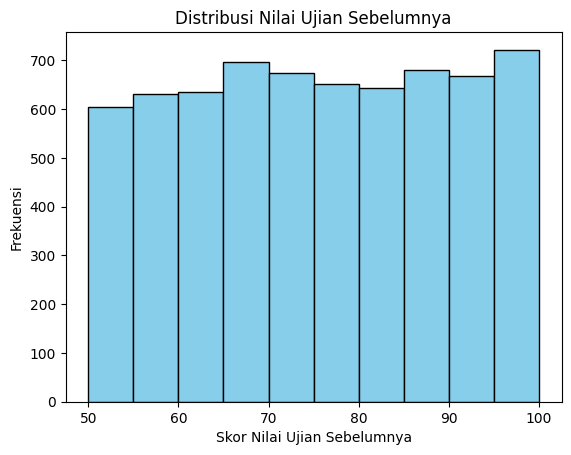

In [ ]:
#@title Matplotlib
import matplotlib.pyplot as plt

# Histogram distribusi nilai matematika
plt.hist(data['Previous_Scores'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribusi Nilai Ujian Sebelumnya')
plt.xlabel('Skor Nilai Ujian Sebelumnya')
plt.ylabel('Frekuensi')
plt.show()

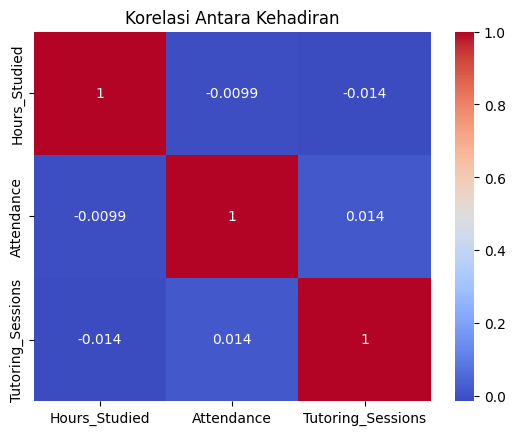

In [ ]:
#@title Seaborn
import seaborn as sns

# Heatmap untuk melihat korelasi antar nilai
correlation_matrix = data[['Hours_Studied', 'Attendance', 'Tutoring_Sessions']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antara Kehadiran')
plt.show()